In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a0de79702531816728e24cb8b2312d9


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | kautokeino
Processing Record 4 of Set 1 | paamiut
Processing Record 5 of Set 1 | lillooet
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 11 of Set 1 | wamba
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | moose factory
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | sabibah
City not found. Skipping...
Processing Record 18 of Set 1 | san pedro
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | ribei

Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | sistranda
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | filadelfia
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | santa marta
Processing Record 44 of Set 4 | ishigaki
Processing Record 45 of Set 4 | ostersund
Processing Record 46 of Set 4 | komsomolskiy
Processing Record 47 of Set 4 | kolokani
Processing Record 48 of Set 4 | manacapuru
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | bahia blanca
Processing Record 1 of Set 5 | camana
Processing Record 2 of Set 5 | rocha
Processing Record 3 of Set 5 | bundaberg
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | ca mau
Processing Record 7 of Set 5 | tocopilla
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 5 | arawa
Processing Record 10

Processing Record 29 of Set 8 | sindand
City not found. Skipping...
Processing Record 30 of Set 8 | kamiiso
Processing Record 31 of Set 8 | caravelas
Processing Record 32 of Set 8 | garowe
Processing Record 33 of Set 8 | canutama
Processing Record 34 of Set 8 | mahon
Processing Record 35 of Set 8 | sobolevo
Processing Record 36 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 37 of Set 8 | sidmouth
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | praia da vitoria
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 44 of Set 8 | nadvoitsy
Processing Record 45 of Set 8 | chlum u trebone
Processing Record 46 of Set 8 | ziarat
Processing Record 47 of Set 8 | tandil
Processing Record 48 of Set 8 | hurghada
Processing Record 49 of Set 8 | ewa beach
Processing Record 50 of Set 8 | fu

Processing Record 17 of Set 12 | funtua
Processing Record 18 of Set 12 | praia
Processing Record 19 of Set 12 | berlevag
Processing Record 20 of Set 12 | kibala
Processing Record 21 of Set 12 | daru
Processing Record 22 of Set 12 | kifri
Processing Record 23 of Set 12 | xinye
Processing Record 24 of Set 12 | los llanos de aridane
Processing Record 25 of Set 12 | lasa
Processing Record 26 of Set 12 | otane
Processing Record 27 of Set 12 | hays
Processing Record 28 of Set 12 | kawalu
Processing Record 29 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 12 | dongsheng
Processing Record 31 of Set 12 | akdepe
Processing Record 32 of Set 12 | sept-iles
Processing Record 33 of Set 12 | halalo
City not found. Skipping...
Processing Record 34 of Set 12 | dormidontovka
Processing Record 35 of Set 12 | naze
Processing Record 36 of Set 12 | qandahar
City not found. Skipping...
Processing Record 37 of Set 12 | waverly
Processing Record 38 of Set 12 | owerri
Processing R

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.69,128.87,9.55,91,100,27.63,RU,2020-10-25 04:37:49
1,Tuktoyaktuk,69.45,-133.04,23.00,92,75,17.22,CA,2020-10-25 04:37:50
2,Kautokeino,69.01,23.04,26.37,97,89,8.59,NO,2020-10-25 04:37:50
3,Paamiut,61.99,-49.67,30.94,84,100,11.70,GL,2020-10-25 04:35:41
4,Lillooet,50.69,-121.94,30.20,46,90,6.93,CA,2020-10-25 04:33:48
5,Busselton,-33.65,115.33,86.00,23,79,5.73,AU,2020-10-25 04:37:50
6,Hermanus,-34.42,19.23,60.01,87,55,6.78,ZA,2020-10-25 04:37:50
7,Hobart,-42.88,147.33,59.00,46,40,12.75,AU,2020-10-25 04:33:10
8,Wamba,8.93,8.60,71.76,86,91,1.92,NG,2020-10-25 04:37:51
9,Butaritari,3.07,172.79,81.27,69,93,6.71,KI,2020-10-25 04:37:51


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2020-10-25 04:37:49,71.69,128.87,9.55,91,100,27.63
1,Tuktoyaktuk,CA,2020-10-25 04:37:50,69.45,-133.04,23.00,92,75,17.22
2,Kautokeino,NO,2020-10-25 04:37:50,69.01,23.04,26.37,97,89,8.59
3,Paamiut,GL,2020-10-25 04:35:41,61.99,-49.67,30.94,84,100,11.70
4,Lillooet,CA,2020-10-25 04:33:48,50.69,-121.94,30.20,46,90,6.93
5,Busselton,AU,2020-10-25 04:37:50,-33.65,115.33,86.00,23,79,5.73
6,Hermanus,ZA,2020-10-25 04:37:50,-34.42,19.23,60.01,87,55,6.78
7,Hobart,AU,2020-10-25 04:33:10,-42.88,147.33,59.00,46,40,12.75
8,Wamba,NG,2020-10-25 04:37:51,8.93,8.60,71.76,86,91,1.92
9,Butaritari,KI,2020-10-25 04:37:51,3.07,172.79,81.27,69,93,6.71


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603600745.5942004

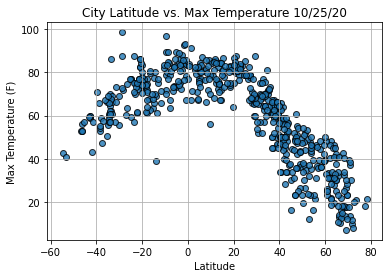

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

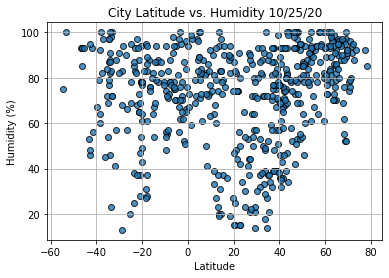

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

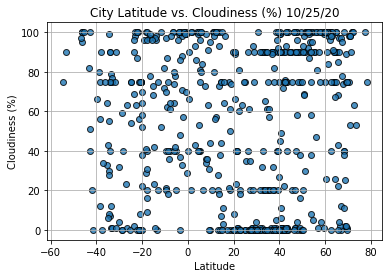

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

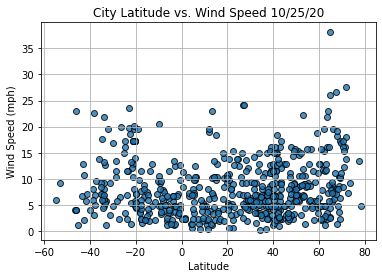

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-51-f235f13efcbc>, line 6)

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-52-8677a9d312d4>, line 6)

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-53-1d3c2bd0b2d6>, line 6)

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n 
                       for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-58-02ddb9d1ad8d>, line 6)

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-59-3dc99b339452>, line 6)

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-60-c0542ff1d59f>, line 6)

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-61-7024af74f12d>, line 6)

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-62-8c4f0e57bb27>, line 6)